In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
import random
import cv2
import random
from sklearn.model_selection import train_test_split

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
categories = ['WithMask','WithoutMask']

In [3]:
data = []
for category in categories:
    path = os.path.join('Train',category) 
    #print(path)
    
    label = categories.index(category)
    
    for file in os.listdir(path):
        img_path = os.path.join(path,file)
        img_array = cv2.imread(img_path)
        new_array = cv2.resize(img_array,(224,224))
        data.append([new_array,label]) 

In [4]:
print(f"Length of the data: {len(data)}")

Length of the data: 10000


In [5]:
# shufling the data
random.shuffle(data)

In [6]:
X = []
y = []
for features,label in data:
    X.append(features)
    y.append(label)

In [7]:
print(len(X))
print(len(y))

10000
10000


In [8]:
# converting to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
print(f"Shape of X:{X.shape}")
print(f"Shape of Y:{y.shape}")

Shape of X:(10000, 224, 224, 3)
Shape of Y:(10000,)


In [12]:
# Normalizing the data
X = X/255

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [14]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (8000, 224, 224, 3)
Shape of X_test: (2000, 224, 224, 3)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


# Using Pre-trained VGG16 model

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
vgg = VGG16()

Metal device set to: Apple M1


2022-02-16 19:40:58.435501: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-16 19:40:58.437104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [34]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [37]:
model = Sequential()

In [38]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [40]:
# frezing the weights
for layer in model.layers:
    layer.trainable = False

In [41]:
model.summary()
# now trainable parameters are zero

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [43]:
# adding Dense layer to VGG16 at the end
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [45]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics='accuracy')

In [46]:
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_test,y_test))

2022-02-16 19:52:20.123647: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-16 19:52:20.234913: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-02-16 19:52:21.629109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 0.2203 - accuracy: 0.9196

2022-02-16 19:55:42.041166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 248s 968ms/step - loss: 0.2203 - accuracy: 0.9196 - val_loss: 0.1331 - val_accuracy: 0.9560
Epoch 2/10
250/250 [==============================] - 225s 902ms/step - loss: 0.1255 - accuracy: 0.9539 - val_loss: 0.0998 - val_accuracy: 0.9635
Epoch 3/10
250/250 [==============================] - 203s 813ms/step - loss: 0.1009 - accuracy: 0.9641 - val_loss: 0.0964 - val_accuracy: 0.9675
Epoch 4/10
250/250 [==============================] - 222s 887ms/step - loss: 0.0878 - accuracy: 0.9679 - val_loss: 0.1102 - val_accuracy: 0.9630
Epoch 5/10
250/250 [==============================] - 188s 753ms/step - loss: 0.0773 - accuracy: 0.9736 - val_loss: 0.0710 - val_accuracy: 0.9755
Epoch 6/10
250/250 [==============================] - 188s 754ms/step - loss: 0.0729 - accuracy: 0.9763 - val_loss: 0.0682 - val_accuracy: 0.9780
Epoch 7/10
250/250 [==============================] - 221s 884ms/step - loss: 0.0690 - accuracy: 0.9763 - val_loss: 0.0608 - val_accura

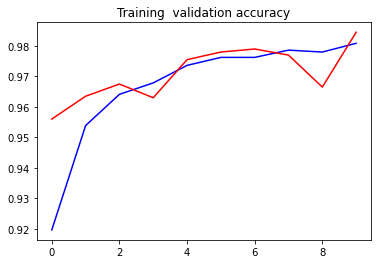

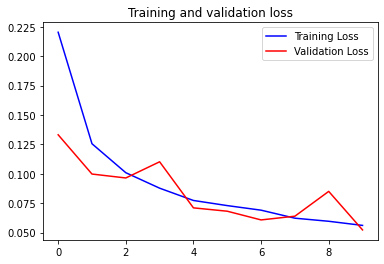

In [48]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training  validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
#model.save('VGG16_mask.h5')

In [2]:
model = tf.keras.models.load_model("VGG16_mask.h5")

Metal device set to: Apple M1


2022-02-17 03:55:15.642449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-17 03:55:15.642714: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
print(f"Model Evaluation: {model.evaluate(X_test,y_test)[1]*100}")

2022-02-17 03:06:37.173385: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-17 03:06:37.224236: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-17 03:06:37.960148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 41s 569ms/step - loss: 0.0510 - accuracy: 0.9830
Model Evaluation: 98.30000400543213


In [3]:
cap = cv2.VideoCapture(0)

In [4]:
def detect(img):
    pred = model.predict_classes(img.reshape(1,224,224,3))
    return pred[0][0]

In [5]:
def draw_label(img,text,position,color):
    
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1, cv2.FILLED)
    
    end_x = position[0] + text_size[0][0] + 2
    end_y = position[1] + text_size[0][1] + 2
    
    cv2.rectangle(img,position,(end_x,end_y),color,cv2.FILLED)
    cv2.putText(img, text, position, cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0,0,0),1,cv2.LINE_AA)
    

In [ ]:
while True:
    ret, frame = cap.read()
    # call detection method
    img = cv2.resize(frame,(224,224))
    
    y_pred = detect(img)
    
    if y_pred == 0:
        draw_label(frame, "Mask",(40,50),(0,255,0))
    else:
        draw_label(frame, "Without Mask",(10,10),(0,0,255))
    
    cv2.imshow("window",frame)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
cv2.destroyAllWindows()

In [86]:
sample = cv2.imread('sample.png')
sample = cv2.resize(sample, (224,224))

In [87]:
detect(sample)

1

In [88]:
sample1 = cv2.imread('14.png')
sample1 = cv2.resize(sample1, (224,224))

In [89]:
detect(sample1)

0

In [13]:
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [14]:
def detect_face(img):
    
    cod = haar.detectMultiScale(img)
    return cod 

In [ ]:
while True:
    ret, frame = cap.read()
    
    
    cod = detect_face(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
    
    for x,y,w,h in cod:
        
        img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)
        
    
    
    cv2.imshow("window",frame)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
cv2.destroyAllWindows()